In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/

In [ ]:
# Reading the cleaned housing data
import pandas as pd
from sklearn.feature_extraction.text import CountVecto rizer
import numpy as np

# housing_prices=pd.read_csv("cleaned_data_3_3_22.csv")
housing_prices=pd.read_csv('/content/drive/Shareddrives/DSCI560 INDEX ZERO/Data Preprocessing/cleaned_data_3_9_22.csv')
housing_prices.columns

Index(['geoid', 'geoid2', 'TotalPopulation', 'Ozone', 'PM25', 'DieselPM',
       'DrinkingWater', 'Lead', 'Pesticides', 'ToxRelease', 'Traffic',
       'CleanupSites', 'GroundwaterThreats', 'HazWaste', 'ImpWaterBodies',
       'SolidWaste', 'Asthma', 'LowBirthWeight', 'CardiovascularDisease',
       'Education', 'LinguisticIsolation', 'Poverty', 'Unemployment',
       'HousingBurden', 'Children10years', 'Pop1064years', 'Elderly64years',
       'Hispanic', 'White', 'AfricanAmerican', 'NativeAmerican',
       'AsianAmerican', 'OtherMultiple', 'well_count', 'median_rent'],
      dtype='object')

### One Hot Encoding
Because geoid and geoid2 are categorical variables we need to encode them to feed them into the neural network.

In [ ]:
# get the dummies in a dataframe format
geoid_dum = pd.get_dummies(housing_prices.geoid, prefix='geoid')
geoid2_dum = pd.get_dummies(housing_prices.geoid2, prefix='geoid2')

In [ ]:
# remove the string geoid columns from the housing data
housing_prices = housing_prices.drop(["geoid", "geoid2"], axis=1)

In [ ]:
# adding the dummies to the housing data
add_dummies = housing_prices.join(geoid_dum)
add_dummies = add_dummies.join(geoid2_dum)

In [ ]:
# Separate Target Variable and Predictor Variables
target = ['median_rent']
 
X = add_dummies.drop(["median_rent"], axis = 1)
predictive_columns = X.columns
X = X.values
y=add_dummies[target].values

### Sandardization of data ###
from sklearn.preprocessing import MinMaxScaler
PredictorScaler=MinMaxScaler()
TargetVarScaler=MinMaxScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1640, 4718)
(1640, 1)
(703, 4718)
(703, 1)


In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 30, verbose=True)

Epoch 1/30
82/82 [==============================] - 1s 1ms/step - loss: 0.0927
Epoch 2/30
82/82 [==============================] - 0s 2ms/step - loss: 0.0243
Epoch 3/30
82/82 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 4/30
82/82 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 5/30
82/82 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 6/30
82/82 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 7/30
82/82 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 8/30
82/82 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 9/30
82/82 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 10/30
82/82 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 11/30
82/82 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 12/30
82/82 [==============================] - 0s 1ms/step - loss: 8.2541e-04
Epoch 13/30
82/82 [==========================

In [ ]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-',
                  'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, 
                                                                           str(batch_size_trial)+'-'+str(epochs_trial), 
                                                                           100-MAPE]],
                                                                    columns=['TrialNumber', 
                                                                             'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 74.18731902294776
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 76.19482451883508
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 74.97430462807769
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 72.67068802680802
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 59.49628199841578
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 74.3987974007567
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 71.98826154624233
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 74.58677246961697
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 74.21812154995793
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 73.76728548807924
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 72.7726229452664
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 74.51200636837063
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 72.27132943165772
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 72.65636671968934
15 Parameters: batch_s

Visualizing the results of parameter trials for ANN

This graph shows that the best set of parameters are batch_size=5 and epochs=100. Next step is to train the model with these parameters.

In [ ]:
print(ResultsData.loc[ResultsData['Accuracy'] == max(ResultsData['Accuracy'])])

  TrialNumber Parameters   Accuracy
0           2       5-10  76.194825


The parameters with the highest accuracy are batch size = 5, epochs = 10

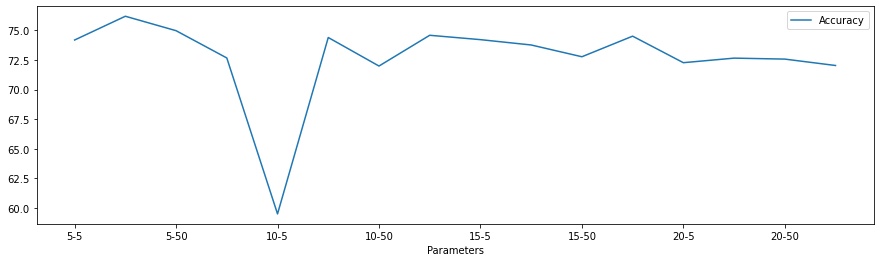

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

Use the following cells to create the model from scratch and save it. Before moving forward, double check the format of input data and combine code from Madi's pre-processing if necessary.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

dir = "/content/drive/Shareddrives/DSCI560 INDEX ZERO/Modeling_3_22/Emily, Neural Networks"

# Fitting the ANN to the Training set
def create_model(X_train, y_train, batch_size, epochs):
  # create ANN model
  model = Sequential()
  # Defining the first layer of the model
  model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

  # Defining the Second layer of the model
  model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

  # The output neuron is a single fully connected node 
  # Since we will be predicting a single number
  model.add(Dense(1, kernel_initializer='normal'))

  # Compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam')

  # Fitting the ANN to the Training set
  model.fit(X_train, y_train ,batch_size = batch_size, epochs = epochs, verbose=0)

  return model

In [ ]:
# Use the highest performing parameters (batch_size=5, epochs=10)
final_model = create_model(X_train, y_train, batch_size=5, epochs=10)

# Score model using test data
scores = final_model.evaluate(X_test, y_test, verbose=0)
print((final_model.metrics_names, scores))

# # Generating Predictions on testing data
# Predictions=final_model.predict(X_test)

# # Scaling the predicted Price data back to original price scale
# Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# # Scaling the y_test Price data back to original price scale
# y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# # Scaling the test data back to original scale
# Test_Data=PredictorScalerFit.inverse_transform(X_test)

(['loss'], 0.010799141600728035)


In [ ]:
# Save model to json
import os
def save_model(model, path):
  # Make sure the base path exists
  if not os.path.exists(path):
    os.makedirs(path)
  json_path = os.path.join(path, "ANN_model.json")
  weights_path = os.path.join(path, "ANN_model.h5")
  
  # Save model in json form
  model_json = model.to_json()

  with open (json_path, 'w') as json_file:
    json_file.write(model_json)
    json_file.close()
  
  # Save model weights to HDF5
  model.save_weights(weights_path)
  print("Saved model to disk")

def load_model(json_path, weights_path):
  # Load json and use model
  with open(json_path, "r") as json_file:
    loaded_model_json = json_file.read()
    json_file.close()

  loaded_model = model_from_json(loaded_model_json)

  # Load weights into the model
  loaded_model.load_weights(weights_path)
  print("Loaded model from disk")

  return loaded_model

In [ ]:
json_path = dir + "/Models/ANN_model.json"
weights_path = dir + "/Models/ANN_model.h5"

save_model(final_model, dir + '/Models/')

loaded_model = load_model(json_path, weights_path)

Saved model to disk
Loaded model from disk


In [ ]:
# Evaluate loaded model on test data
loaded_model.compile(loss='mean_squared_error', optimizer='adam')

# Score model using test data
scores = loaded_model.evaluate(X_test, y_test, verbose=0)
print((loaded_model.metrics_names, scores))

# Generating Predictions on testing data
Predictions=loaded_model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

(['loss'], 0.010799141600728035)


In [ ]:
TestingData=pd.DataFrame(data=Test_Data, columns=predictive_columns)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

,TotalPopulation,Ozone,PM25,DieselPM,DrinkingWater,Lead,Pesticides,ToxRelease,Traffic,CleanupSites,...,geoid2_6037980023,geoid2_6037980024,geoid2_6037980025,geoid2_6037980026,geoid2_6037980028,geoid2_6037980030,geoid2_6037980031,geoid2_6037980033,Price,PredictedPrice
0,0.481910,0.433335,0.310557,0.228886,1.147486,-0.123805,-0.048787,-0.311553,0.948365,0.636178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1180.0,1272.058960
1,-0.141351,-1.481798,-0.027058,-0.625355,-1.502848,-0.491571,-0.048787,1.091360,-0.814047,-0.648360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1155.0,1211.146729
2,-0.513055,0.350377,0.419791,-0.791854,0.840651,0.912308,-0.048787,-0.269651,-0.400678,-0.579852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1457.0,1456.477783
3,0.160267,0.936403,0.387121,-0.206325,0.655164,-2.743208,0.083702,-0.580154,-0.348817,-0.448543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1935.0,1783.542480
4,-0.554981,-0.245994,0.490301,0.447858,0.386403,1.484996,-0.048787,-0.205694,-0.853022,-0.608397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1008.0,1085.808594


In [ ]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 83.22859065758703


,TotalPopulation,Ozone,PM25,DieselPM,DrinkingWater,Lead,Pesticides,ToxRelease,Traffic,CleanupSites,...,geoid2_6037980024,geoid2_6037980025,geoid2_6037980026,geoid2_6037980028,geoid2_6037980030,geoid2_6037980031,geoid2_6037980033,Price,PredictedPrice,APE
0,0.481910,0.433335,0.310557,0.228886,1.147486,-0.123805,-0.048787,-0.311553,0.948365,0.636178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1180.0,1362.523804,15.468119
1,-0.141351,-1.481798,-0.027058,-0.625355,-1.502848,-0.491571,-0.048787,1.091360,-0.814047,-0.648360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1155.0,1423.826172,23.274993
2,-0.513055,0.350377,0.419791,-0.791854,0.840651,0.912308,-0.048787,-0.269651,-0.400678,-0.579852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1457.0,1442.174438,1.017540
3,0.160267,0.936403,0.387121,-0.206325,0.655164,-2.743208,0.083702,-0.580154,-0.348817,-0.448543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1935.0,1764.356812,8.818769
4,-0.554981,-0.245994,0.490301,0.447858,0.386403,1.484996,-0.048787,-0.205694,-0.853022,-0.608397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1008.0,1057.554443,4.916115
